# Model Analysis

## Import Modules

In [1]:
%load_ext autoreload

%aimport RunParameters
%aimport TDistribution

%autoreload 1

In [2]:
import warnings
warnings.filterwarnings("ignore", message=r"elementwise", category=FutureWarning)

## Check Run Parameters

In [3]:
EPOCHS = 200000
REF = '200k'
BKG = '10k'
MODEL = 9

WCLIP = 4
NTOYS = 120

# DATA_FOLDER = f'/lustre/cmswork/nlai/DRIFT_TIME/model_{MODEL}/'
# DATA_FOLDER = f'/lustre/cmswork/nlai/DRIFT_TIME/model_testing/ref_E100kR200kB3kW2.5'
# DATA_FOLDER = f'/lustre/cmswork/nlai/DRIFT_TIME/'
# OUT_PATH = DATA_FOLDER + f'E{EPOCHS}R{REF}B{BKG}W{WCLIP}_model_{MODEL}'

DATA_FOLDER = f'/lustre/cmswork/nlai/DRIFT_TIME/thesis_test_w{WCLIP}_t{NTOYS}/'
OUT_PATH = DATA_FOLDER

DOF = 10
NFOLDER = 0

rPar = RunParameters.RunParameters(OUT_PATH, NFOLDER, NTOYS)
toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
rPar.print_parameters()

OUT_FILE_t = rPar.fetch_file()
OUT_FILE_t_history = rPar.fetch_history()


Folder name: E100000_latent3_layers1_wclip4.0_ntoy120_ref200000_bkg3000_sig0_patience1000
File name: E100000_latent3_layers1_wclip4.0_ntoy120_ref200000_bkg3000_sig0_patience1000_t.txt

Parameters:                                                                      
 Toys:          120                                              
 Latent space:  3                                            
 Layers:        1                                            
 W_clip:        4.0                                            
 Epochs:        100000                                            
 Patience:      1000                                     
 Ref, Bkg, Sig: 200000 3000 0 



## Model Analysis

In [4]:
BINS = 8
SAVE_FIG = 0

tDist = TDistribution.TDist(DOF, BINS, toys, epochs, ref, bkg, check_point_t, w_clip, OUT_PATH, OUT_FILE_t, OUT_FILE_t_history, SAVE_FIG)
tDist.getT()
tDist.computeMedian()


Toys at disposal/Total toys: 120/120

Median t distribution:  9.2430735
Median p-value: 0.5000            Median significance: 0.0000            from t list
Median p-value: 0.5092            Median significance: -0.0231            from chi2 distribution


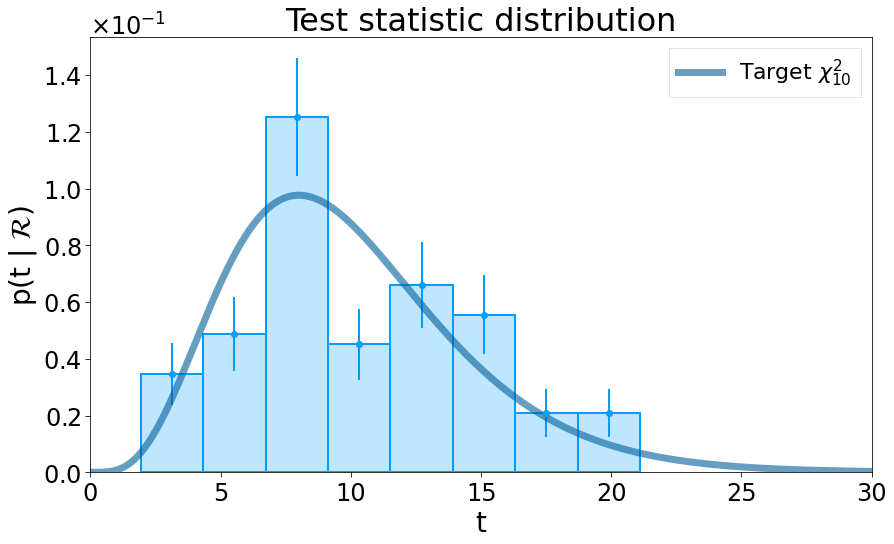

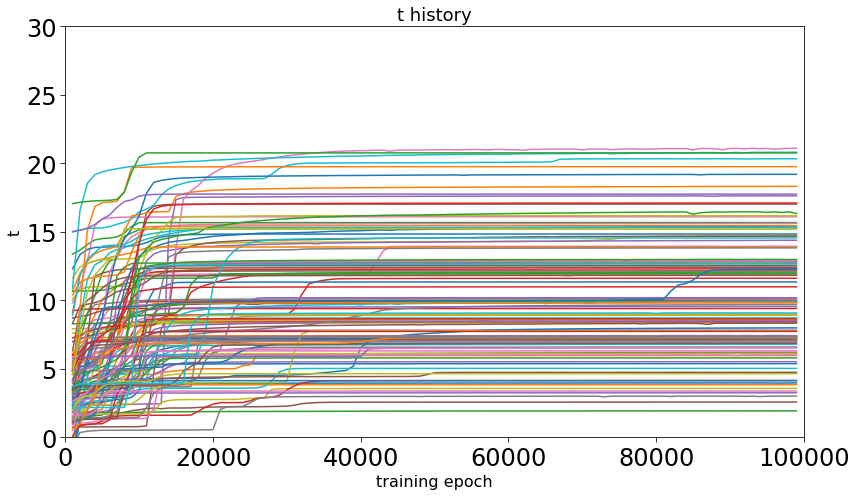

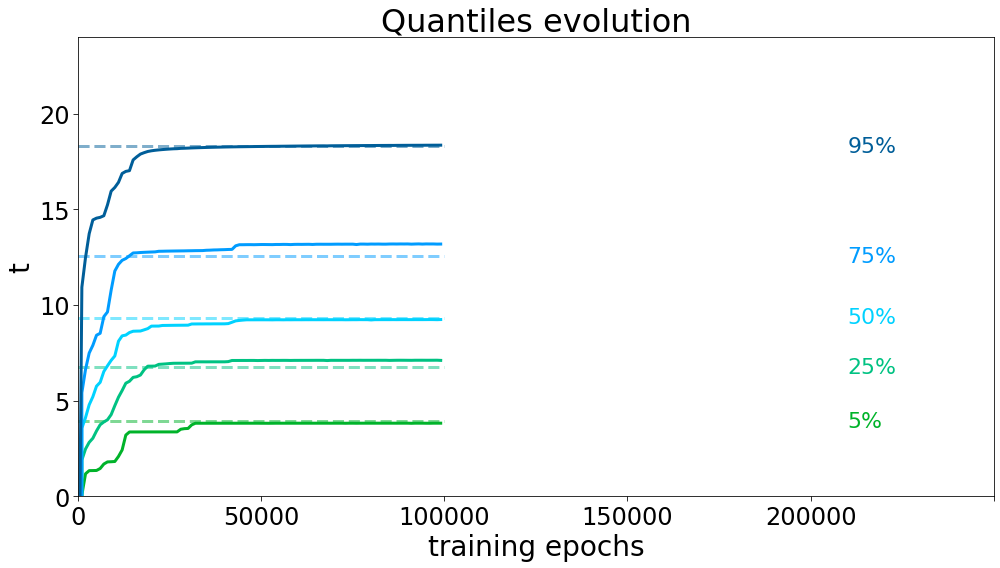

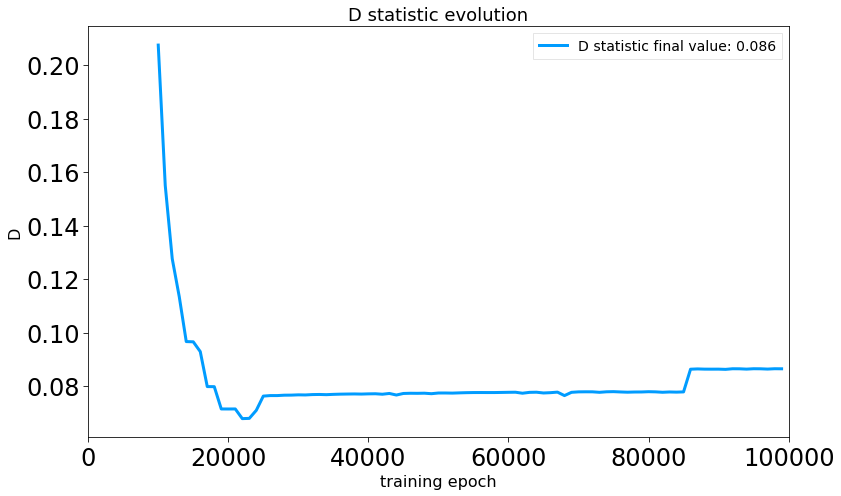

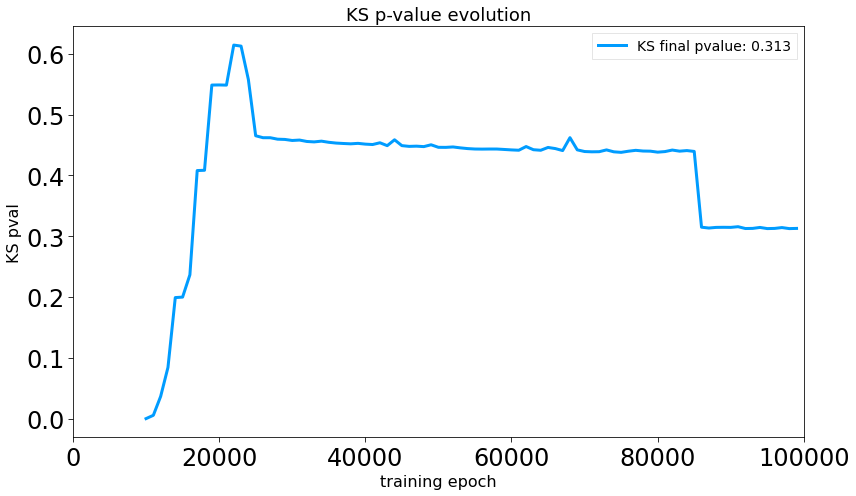

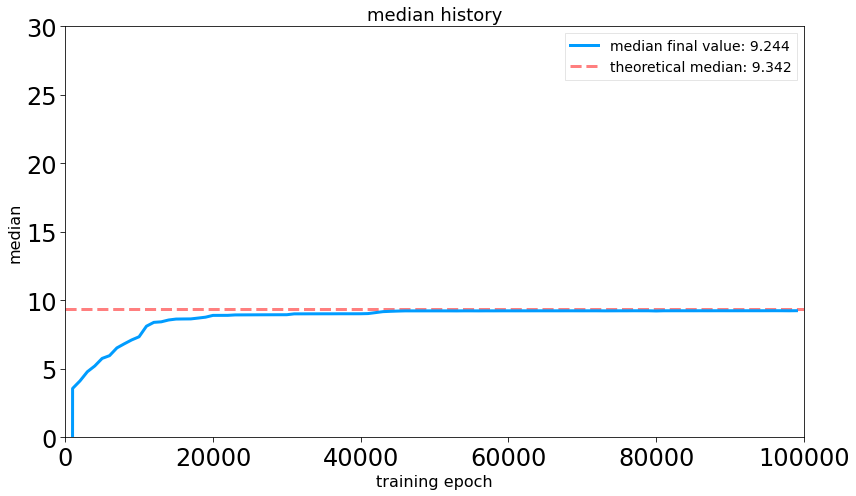

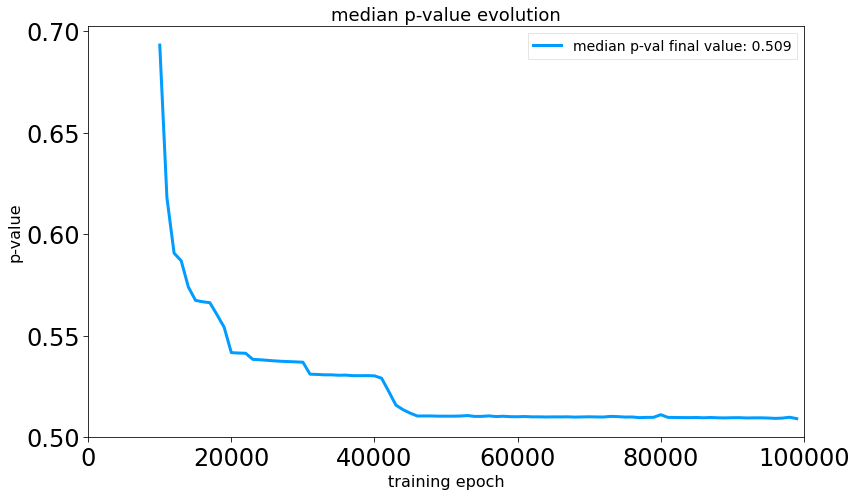

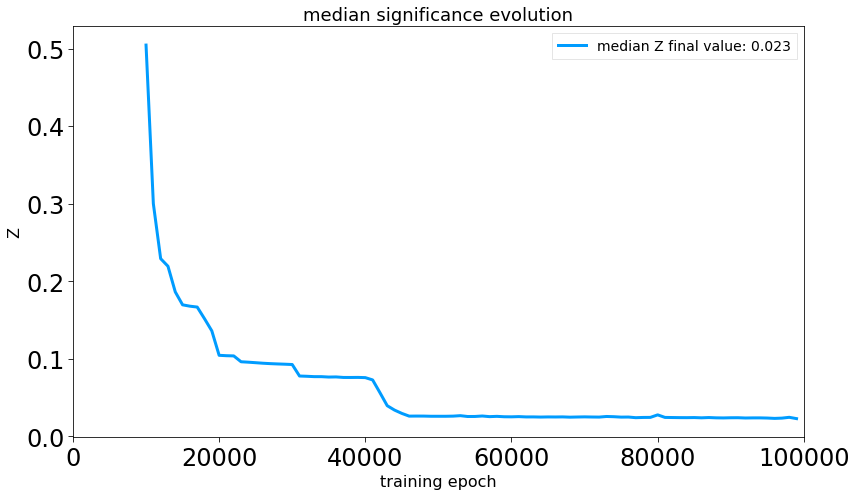

In [5]:
tDist.plotTdist()
tDist.plotThistory()
tDist.plotQuantilesEvo()
tDist.ks_test_evo()

# tDist.thesisPlot()

# tDist.plotChi2History()
# tDist.plotChi2Compatibility()
# tDist.plotChi2Compatibility2()
# tDist.plotPValHistory()
# tDist.plotSignificanceHistory()

tDist.plotMedianHistory()
tDist.plotMedianPval()
tDist.plotMedianZ()